In [1]:
import pandas as pd
import glob, os, re
from tika import parser
import gensim
from gensim.models import Word2Vec
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:\\Users\\Ruben\\Downloads\\metadata')

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
def clean_and_split_str(txt):
    translator = str.maketrans('', '', string.punctuation)
    txt = txt.translate(translator)
    txt = re.sub('\s+', ' ', txt).strip()
    txt = txt.lower()
    txt = txt.split(' ')
    return txt

In [4]:
dict_tokens = dict()

for y in [1850,1860,1870,1880]:
    
    direct = 'C:\\Users\\Ruben\\Downloads\\metadata' + "\\ads_all_" + str(y) + 's\\split'
    os.chdir(direct)
    lcsv = glob.glob('*.csv')
    
    for csv in lcsv:
        df = pd.read_csv(csv, sep = '\t')
        
        for year in list(set(list(df['date'].astype(str).str[0:4]))):
            ssy = df[df['date'].astype(str).str[0:4] == year]
            tokens = [clean_and_split_str(i) for i in ssy.ocr]
            tokens = [item for sublist in tokens for item in sublist]
            
            if year in dict_tokens:
                dict_tokens[year] += len(tokens)
            else:
                dict_tokens[year] = len(tokens)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
df = pd.DataFrame([dict_tokens.keys(),dict_tokens.values()]).T
df.columns = ['year','tokens']
df =df.sort_values(['year'],ascending=False)
df = df.iloc[1:,:]
df['year'] = df['year'].astype(int)
#df.plot(x='year',y='tokens')

In [15]:
ssy

,id,date,paper_title,issue_id,page_id,page,n_pages,image_url,ocr_url,ocr,min_x,min_y,max_x,max_y,w,h,area
0,ddd:011068705:mpeg21:a0076,1884/09/18 00:00:00,De standaard,ddd:011068705:mpeg21,ddd:011068705:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01106870...,"De Makelaars A. J. ANDEIES, O. G. BUNJES en W....",3085,146,3830,3322,745,3176,2366120
1,ddd:011068705:mpeg21:a0077,1884/09/18 00:00:00,De standaard,ddd:011068705:mpeg21,ddd:011068705:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01106870...,"Puike Franscbe Cognac, uitmuntend voor de gezo...",3085,3324,3830,5697,745,2373,1767885
2,ddd:010588946:mpeg21:a0033,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,"P. T. LAPONDER, EXPEDITEUR-COMMISSIONAIR, _i>-...",2803,3337,3664,5464,861,2127,1831347
3,ddd:010588946:mpeg21:a0025,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,ONDER MUS. BURGEMEESTER bm WETHOUDERS van DANT...,999,132,1880,2793,881,2661,2344341
4,ddd:010588946:mpeg21:a0026,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,ADVERTK IN T l E N. Bekendmaking. r*r KAMBB va...,109,664,982,2576,873,1912,1669176
5,ddd:010588946:mpeg21:a0027,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,ONDERWIJZER. Iv de gemeente Franeker wordt ver...,999,2803,1877,5463,878,2660,2335480
6,ddd:010588946:mpeg21:a0028,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,Aanbesteding. Ten Genieentehuize van Leeuwarde...,73,4703,974,5456,901,753,678453
7,ddd:010588946:mpeg21:a0029,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,Wij berichten de ontvangst der nieuwe _tfA|AA&...,1898,41,3739,1289,1841,1248,2297568
8,ddd:010588946:mpeg21:a0030,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,"Verhuring te Paesens. 11. BANDA, Notaris te An...",1911,1315,2777,3535,866,2220,1922520
9,ddd:010588946:mpeg21:a0031,1884/09/18 00:00:00,Leeuwarder courant,ddd:010588946:mpeg21,ddd:010588946:mpeg21:p004,4,4,http://imageviewer.kb.nl/ImagingService/imagin...,http://resolver.kb.nl/resolve?urn=ddd:01058894...,AAHKOHDIGIJTG. Bij geregistreerd exploit van m...,1907,3544,2775,5459,868,1915,1662220


In [21]:
dict_newspapers = dict()

for y in [1850,1860,1870,1880]:
    
    direct = 'C:\\Users\\Ruben\\Downloads\\metadata' + "\\ads_all_" + str(y) + 's\\split'
    os.chdir(direct)
    lcsv = glob.glob('*.csv')
    
    for csv in lcsv:
        df = pd.read_csv(csv, sep = '\t')
        
        for year in list(set(list(df['date'].astype(str).str[0:4]))):
            ssy = df[df['date'].astype(str).str[0:4] == year]
            list_npp = list(set(ssy['paper_title']))
            
            if year in dict_newspapers:
                dict_newspapers[year] = dict_newspapers[year] + list_npp
            else:
                dict_newspapers[year] = list_npp

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5,6,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


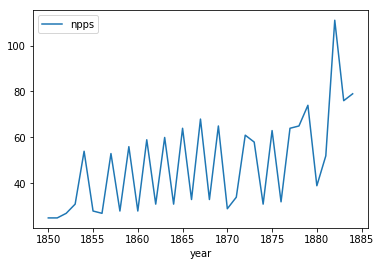

In [28]:
dfn = pd.DataFrame([dict_newspapers.keys(),[len(v) for k,v in dict_newspapers.items()]]).T
dfn.columns = ['year','npps']
dfn =dfn.sort_values(['year'],ascending=False)
dfn = dfn.iloc[1:,:]
dfn['year'] = dfn['year'].astype(int)
dfn.plot(x='year',y='npps')

In [32]:
df['npps'] = dfn['npps']

In [34]:
## Count number of extracted windows

os.chdir("C://Users//Ruben//Documents//GitHub//dhl-ads//resources")
dfr = pd.read_csv('total_results.csv')

In [37]:
dict_extr = dict()

for year in list(set(list(dfr['date'].astype(str).str[0:4]))):
    ssy = dfr[dfr['date'].astype(str).str[0:4] == year]
    dict_extr[year] = len(ssy)

In [39]:
dfa = pd.DataFrame([dict_extr.keys(),dict_extr.values()]).T
dfa.columns = ['year','windows']
dfa =dfa.sort_values(['year'],ascending=False)
#dfa = dfa.iloc[1:,:]
dfa['year'] = dfa['year'].astype(int)

In [41]:
df['windows'] = dfa['windows']

In [44]:
dfa

,year,windows
11,1884,31689
2,1883,38409
23,1882,35009
0,1881,34797
22,1880,31797
24,1879,31897
10,1878,33593
30,1877,28727
6,1876,26133
21,1875,26810


In [45]:
df

,year,tokens,npps,windows
35,1884,25417091,79,NaN
34,1883,29994012,76,7687
33,1882,28345985,111,10592
31,1881,26461665,52,9791
32,1880,25036164,39,10121
30,1879,25233109,74,28727
29,1878,21323452,65,19959
27,1877,22169220,64,3845
28,1876,16421856,32,12788
25,1875,17033551,63,11106
